**COVID19 DETECTION USING CHEST XRAYS**

Downloading the dataset

In [ ]:
!wget 'https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip'

Unzipping the dataset

In [ ]:
!unzip '/content/CovidDataset-20200427T133042Z-001.zip'

Libraries required

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import random
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Model Preparation

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing import image
from keras.optimizers import Adam

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
model.compile(optimizer=Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Model Training and Validation

In [8]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/.255,
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(
    rescale = 1/.255,
)

In [9]:
train_path = '/content/CovidDataset/Train'
test_path = '/content/CovidDataset/Val'

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [11]:
class_dict = train_generator.class_indices
class_dict

{'Covid': 0, 'Normal': 1}

In [12]:
hist = model.fit(
    train_generator,
    epochs = 15,
    validation_data = test_generator,
)

Epoch 1/15
7/7 [==============================] - 13s 1s/step - loss: 1053.2685 - accuracy: 0.4873 - val_loss: 3.8340 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 7.4835 - accuracy: 0.6060 - val_loss: 0.6621 - val_accuracy: 0.5000
Epoch 3/15
7/7 [==============================] - 9s 1s/step - loss: 0.8734 - accuracy: 0.6590 - val_loss: 0.7258 - val_accuracy: 0.4833
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.6746 - accuracy: 0.6371 - val_loss: 0.6026 - val_accuracy: 0.7000
Epoch 5/15
7/7 [==============================] - 9s 1s/step - loss: 0.6698 - accuracy: 0.6951 - val_loss: 0.6225 - val_accuracy: 0.9667
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.5354 - accuracy: 0.7186 - val_loss: 0.5118 - val_accuracy: 0.8167
Epoch 7/15
7/7 [==============================] - 9s 1s/step - loss: 0.5498 - accuracy: 0.7330 - val_loss: 0.3925 - val_accuracy: 0.9667
Epoch 8/15
7/7 [=====================

**Accuracy Vs Epochs Plot**

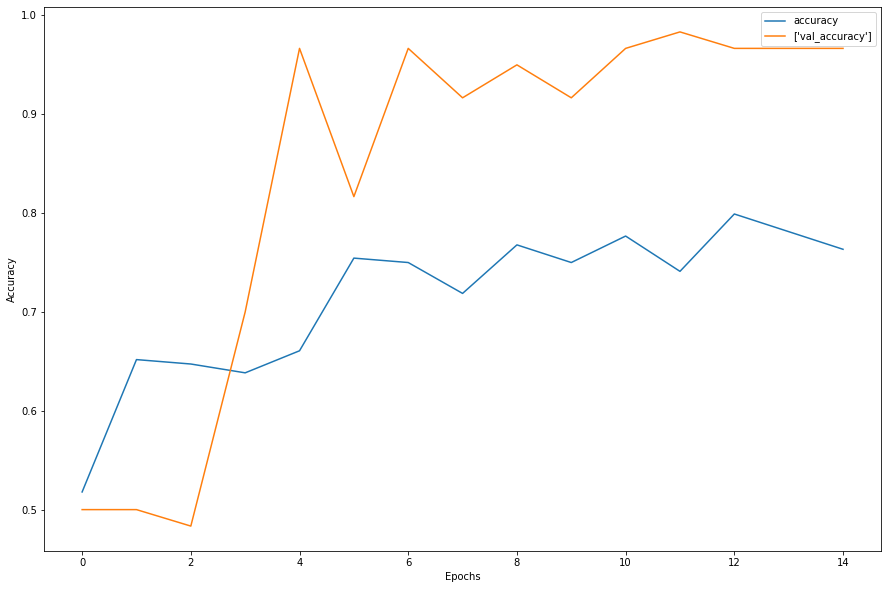

In [24]:
xbar = np.arange(0,15)
plt.figure(figsize=(15,10))
plt.plot(xbar,hist.history['accuracy'])
plt.plot(xbar,hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy',['val_accuracy']])
plt.plot()
plt.savefig("Accuracy_plot.png")

**Saving of model**

In [25]:
model.save('covid19_xray_detection_model.h5')
